## Problem 1

Note: Unfortunately I did not have time to create my own code:( , so I used the code shown in class and added a termination criterion

### (1)

The formulated least square problem is:

min(with respect to A_12 and A_21)
$$ sum(P(x_i, -A) - P)^2 $$
sum from i=1 to i=11


### (2)

Gradient descent:

In [62]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
from IPython import display
import math

X1 = np.array([[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]])
X2 = np.flip(X1, axis=1).copy()
a = np.array(([[8.07131, 1730.63, 233.426], [7.43155, 1554.679, 240.337]]))
T = 20
pwat = 10**(a[0, 0]- a[0,1] / (T + a[0,2]))
pdio = 10**(a[1, 0]- a[1,1] / (T + a[1,2]))
P = np.array([[28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]])
P = torch.tensor(P, requires_grad=False, dtype=torch.float32)

A = Variable(torch.tensor([1.0, 1.0]), requires_grad=True) #includes initial guess

x1 = torch.tensor(X1, requires_grad=False, dtype=torch.float32)
x2 = torch.tensor(X2, requires_grad=False, dtype=torch.float32)

#simple gradient descent
a = 0.0001

g_length = 5
while g_length > 0.001:
    P_pred = x1 * torch.exp(A[0] * (A[1] * x2 / (A[0] * x1 + A[1] * x2 )) ** 2) * pwat + \
        x2 * torch.exp(A[1] * (A[0] * x1 / (A[0] * x1 + A[1] * x2 )) ** 2) * pdio
    
    loss = (P_pred - P) ** 2
    loss = loss.sum() 
    
    loss.backward()
    
    with torch.no_grad():
        A -= a * A.grad #A = A -  a * A.grad
        
        A_gradient = A.grad
        g_length = math.sqrt((A_gradient[0])**2 + (A_gradient[1])**2)
        A_gradient = 0

        A.grad.zero_() #to not keep current gradient
        
        
print('The estimation A12 and A21 is:' , A)
print('The final loss is:', loss.data.numpy())



The estimation A12 and A21 is: tensor([1.9584, 1.6892], requires_grad=True)
The final loss is: 0.67019117


### (3)

The model does fit the data fairly well, almost exactly,  as shown by comparing the values below and in the graph below:

In [63]:
print('The predicted pressure values were:', P_pred)
print('The actual pressure values were:', P)

The predicted pressure values were: tensor([[28.8241, 34.6443, 36.4529, 36.8673, 36.8740, 36.7498, 36.3904, 35.3848,
         32.9478, 27.7300, 17.4733]], grad_fn=<AddBackward0>)
The actual pressure values were: tensor([[28.1000, 34.4000, 36.7000, 36.9000, 36.8000, 36.7000, 36.5000, 35.4000,
         32.9000, 27.7000, 17.5000]])


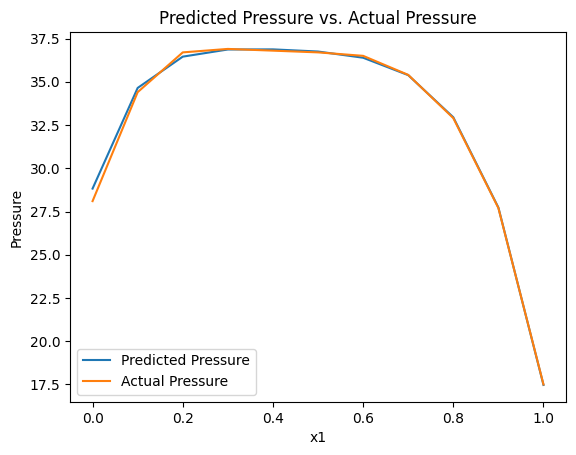

In [64]:
import matplotlib.pyplot as plt
P_pred = P_pred.detach().numpy()[0]
P = P.detach().numpy()[0]
x1 = x1.detach().numpy()[0]


plt.plot(x1, P_pred, label = 'Predicted Pressure')
plt.plot(x1, P, label = 'Actual Pressure')
plt.xlabel('x1')
plt.ylabel('Pressure')
plt.legend()
plt.title('Predicted Pressure vs. Actual Pressure')
plt.show()

## Problem 2

I tried several Baysian Optimization off the self solvers. The first one below is from: https://github.com/fmfn/BayesianOptimization

In [72]:
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events
from bayes_opt.util import load_logs

def thefunction(x1, x2):
    return (4 - 2.1*(x1**2) + ((x1**4) / 3))*(x1**2) + x1*x2 + (-4 + 4*(x2**2))*(x2**2)

#bounds
pbounds = {'x1': (-3, 3), 'x2': (-2, 2)}

optimizer = BayesianOptimization(f=thefunction, pbounds=pbounds, random_state=1)

#optimizer.maximize(init_points=2,n_iter=3,)

logger = JSONLogger(path="./logs.json")
optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

# Results will be saved in ./logs.json
optimizer.maximize(init_points=2,n_iter=3,)

#loading progress

new_optimizer = BayesianOptimization(f=thefunction, pbounds={"x": (-2, 2), "y": (-2, 2)},verbose=2,random_state=7,)

# New optimizer is loaded with previously seen points
load_logs(new_optimizer, logs=["./logs.json"])

TypeError: 'float' object is not subscriptable